# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the two dataframes on 'Mouse ID'
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")



In [4]:
# Checking the number of unique Mouse IDs
number_of_mice = combined_df['Mouse ID'].nunique()
number_of_mice

249

In [5]:
# Finding duplicates based on 'Mouse ID' and 'Timepoint'
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate rows
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Drop all data related to the duplicate Mouse ID
cleaned_df = combined_df[combined_df['Mouse ID'] != 'g989']


# Display the cleaned dataframe to verify
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of unique Mouse IDs in the cleaned DataFrame
number_of_mice_cleaned = cleaned_df['Mouse ID'].nunique()
number_of_mice_cleaned

248

## Summary Statistics

In [16]:
# Group by 'Drug Regimen' and calculate the summary statistics for 'Tumor Volume (mm3)'
regimen_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)

# Display the summary statistics table
regimen_stats


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Using the aggregation method to produce the summary statistics in a single line
advanced_regimen_stats = cleaned_df.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    variance=('Tumor Volume (mm3)', 'var'),
    std_dev=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)

# Display the advanced summary statistics table
advanced_regimen_stats


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

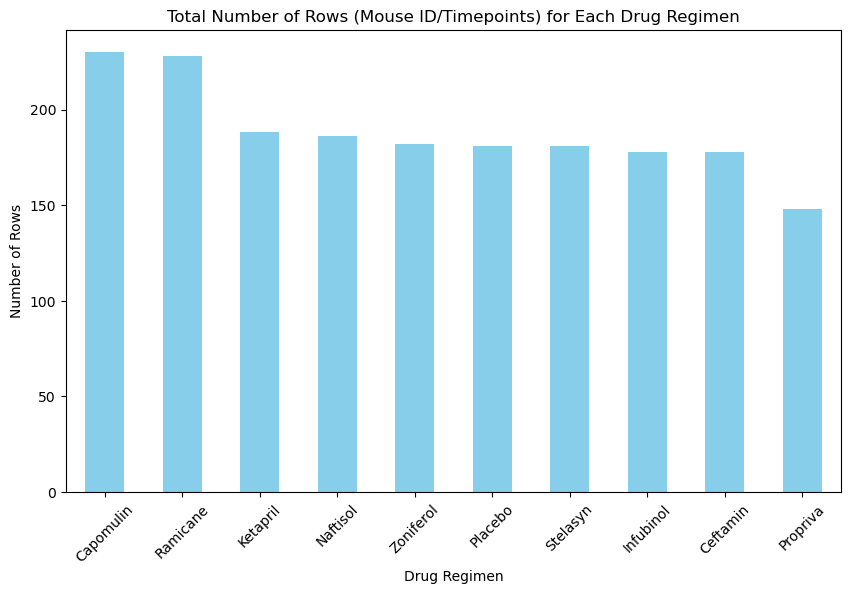

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate the bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen
mouse_timepoint_counts = cleaned_df['Drug Regimen'].value_counts()

# Plotting using Pandas
mouse_timepoint_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding titles and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)

# Display the plot
plt.show()

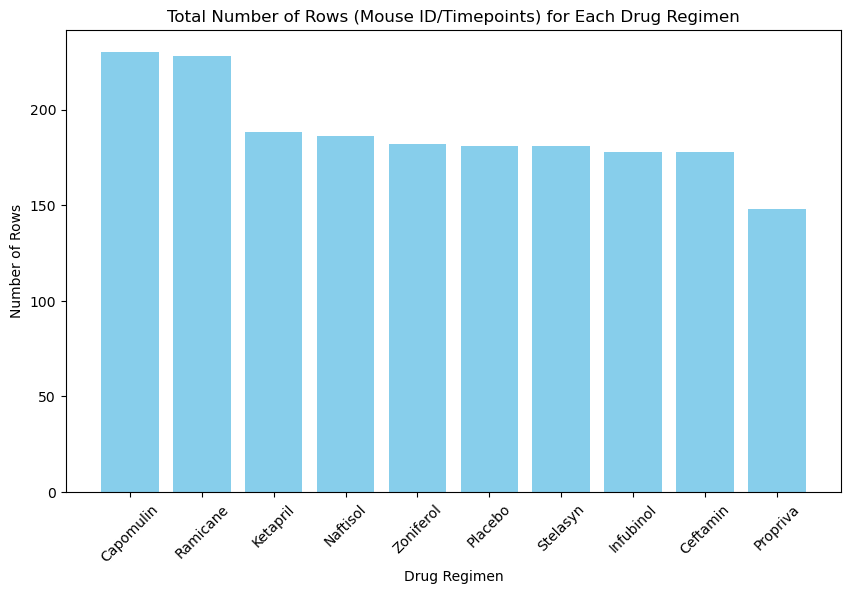

In [20]:
# Generate the bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot

# Prepare data
regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Plotting using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')

# Adding titles and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)

# Display the plot
plt.show()


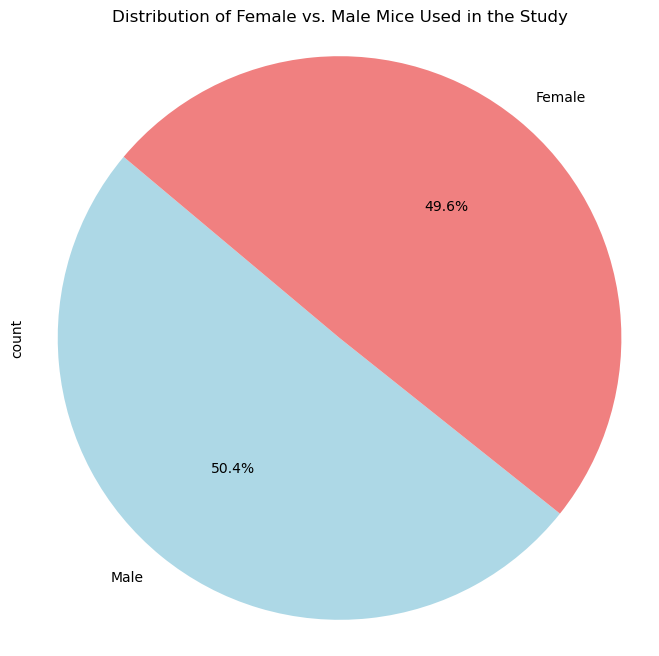

In [21]:

# Make the pie chart
# Get the unique mice with their gender
unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Count the distribution of genders
gender_distribution = unique_mice['Sex'].value_counts()

# Generate a pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'], figsize=(8, 8))

# Adding title
plt.title('Distribution of Female vs. Male Mice Used in the Study')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

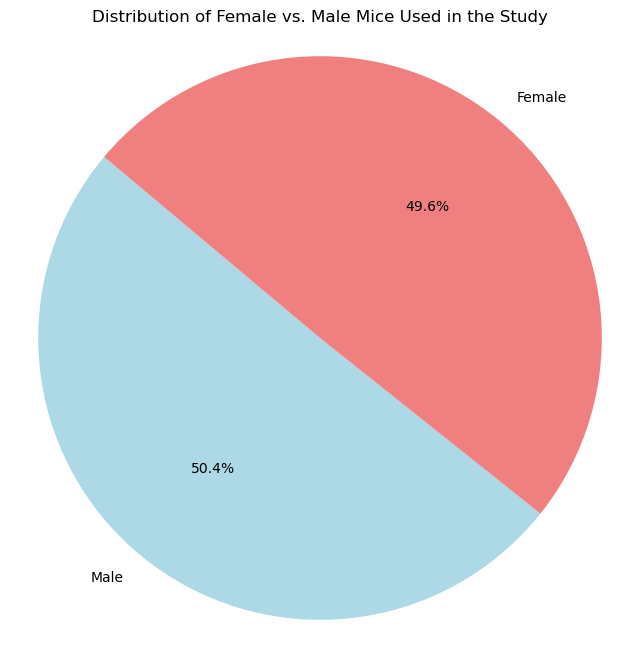

In [22]:
# Get the unique mice with their gender
unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Count the distribution of genders
gender_distribution = unique_mice['Sex'].value_counts()

# Generate a pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])

# Adding title
plt.title('Distribution of Female vs. Male Mice Used in the Study')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# Filter the DataFrame to include only the desired treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
max_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(max_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')

# Display the final tumor volume dataframe to verify
final_tumor_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [24]:
# Define the list of treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for each treatment
tumor_vol_data = []

# Loop through each treatment to calculate the IQR and identify outliers
for treatment in treatments:
    # Locate the rows for mice on each treatment and get the tumor volumes
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add the data to the tumor_vol_data list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using the IQR bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the results
    print(f"{treatment} treatment outliers: {outliers}")

# The tumor_vol_data list is now filled with the tumor volume data for each treatment for plotting
tumor_vol_data


Capomulin treatment outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane treatment outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol treatment outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin treatment outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

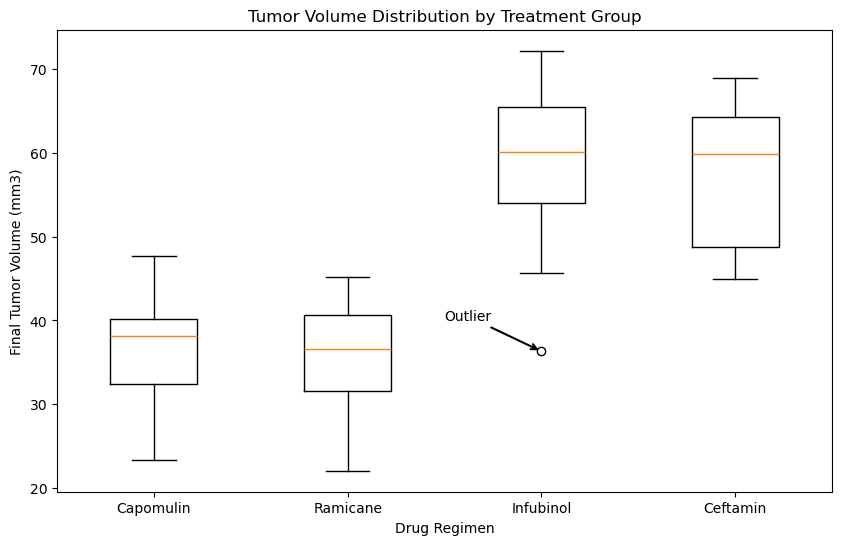

In [25]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Adding titles and labels
plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Highlighting the outlier for Infubinol
plt.annotate('Outlier',
             xy=(3, 36.32), xycoords='data',
             xytext=(2.5, 40), textcoords='data',
             arrowprops=dict(arrowstyle="->", lw=1.5))

# Display the plot
plt.show()

## Line and Scatter Plots

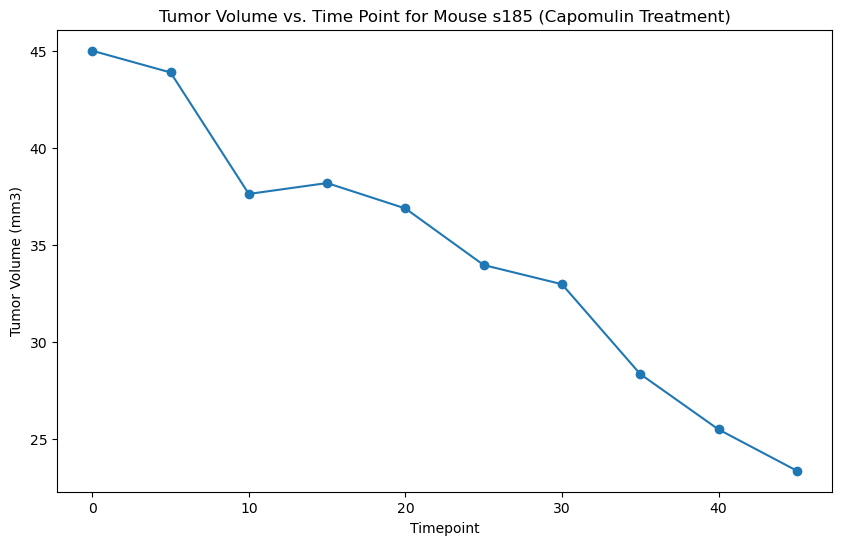

In [26]:
# Select a single mouse treated with Capomulin
single_mouse_id = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin')]['Mouse ID'].iloc[0]

# Filter the DataFrame for this specific mouse
single_mouse_data = cleaned_df[(cleaned_df['Mouse ID'] == single_mouse_id) & (cleaned_df['Drug Regimen'] == 'Capomulin')]

# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

# Adding titles and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


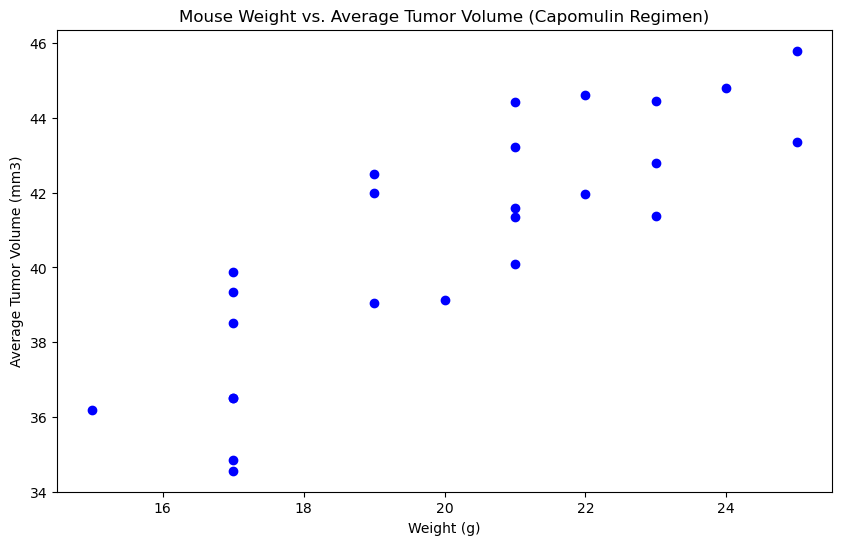

In [27]:
# Calculate the average tumor volume for each mouse in the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
}).reset_index()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue')

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

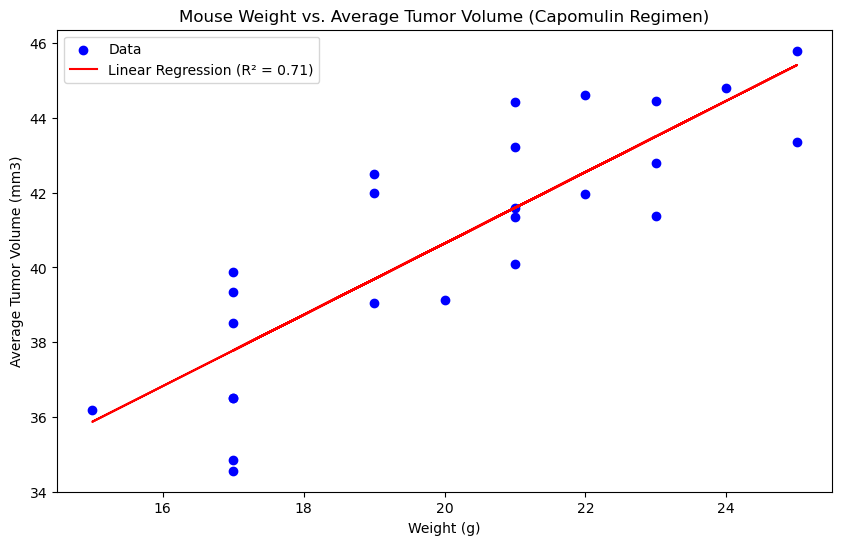

(0.8419363424694722,
 0.9544396890241048,
 21.552160532685008,
 0.7088568047708723,
 1.3225722434712404e-07,
 0.12754359033201323)

In [28]:
# Calculate the correlation coefficient
correlation = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)']
)

# Generate regression line
regression_line = slope * average_tumor_volume['Weight (g)'] + intercept

# Plot the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue', label='Data')
plt.plot(average_tumor_volume['Weight (g)'], regression_line, color='red', label=f'Linear Regression (R² = {r_value**2:.2f})')

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the plot
plt.show()

# Display correlation and linear regression results
correlation, slope, intercept, r_value**2, p_value, std_err
